# Michael Harris & Dave Arno
# Bax 423 Final Project: Supplementary Sentiment Analysis

Some helpful references used for helping to graphing sentiment analysis: 

https://medium.com/the-data-league/twitter-sentiment-analysis-532b4ae674e2

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/analyze-tweet-sentiment-in-python/ 


## Import Packages and define environmental variables.

In [ ]:
# Mount drive to notebook. 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load in API consumer key, secret key, access token, and access secret. 
!cp "/content/drive/Shareddrives/MBA MSBA Project/.env" . 
!pip install -q python-dotenv

In [ ]:
# Import packages, as well as consumer and access keys from dot_env file.

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import numpy as np
import seaborn as sns

import requests
import json
import pandas as pd
import os,base64,re,logging

from tweepy.streaming import StreamListener
from tweepy import OAuthHandler, Stream
from dotenv import load_dotenv

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

load_dotenv()


import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Store our consumer and access tokens and keys in variables for later reference in code.

CONSUMER_KEY = os.environ['CONSUMER_KEY']
CONSUMER_SECRET = os.environ['CONSUMER_SECRET']
ACCESS_TOKEN = os.environ['ACCESS_TOKEN']
ACCESS_SECRET = os.environ['ACCESS_SECRET']

In [ ]:
# Obtain access to API through Tweepy and defined variables.

auth = tw.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
# Use regex to remove the URL from text & clean it prior to placing it in dataframe.

def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

## Los Angeles

In [ ]:
# Create a custom tweet search by defining the query, geographical location, language, and dates from which we are collecting tweets.
query = "#fast-food -filter:retweets"
geoc="34.0522,-118.2437,25mi"
max_tweets = 5000

tweets = tw.Cursor(api.search,
                   q=query, 
                   geocode=geoc,
                   lang="en",
                   since='2018-05-26').items(max_tweets)

# Remove URLs
tweets_cleaned = [remove_url(tweet.text) for tweet in tweets]

In [ ]:
# Create a custom tweet search by defining the query, geographical location, language, and dates from which we are collecting tweets.
query = "#fast-food -filter:retweets"
geoc="34.0522,-118.2437,25mi"
max_tweets = 5000

tweets = tw.Cursor(api.search,
                   q=('fast food OR fastfood OR fast-food OR #fastfood'), 
                   geocode=geoc,
                   lang="en",
                   since='2018-05-26').items(max_tweets)

# Remove URLs
tweets_cleaned = [remove_url(tweet.text) for tweet in tweets]

In [ ]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_cleaned]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.1, TextBlob("AstolfoFGC Finally Trans Fast food"))

In [ ]:
# Create list of polarity valuesx and tweet text
sentiment_scores = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_scores[0]

[0.1, 'AstolfoFGC Finally Trans Fast food']

In [ ]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_scores, columns=["Score", "tweet"])
sentiment_df = sentiment_df[sentiment_df.Score != 0]


sentiment_df.head()

,Score,tweet
0,0.100000,AstolfoFGC Finally Trans Fast food
1,0.200000,cleaning out fast food receipts and straw wrap...
2,0.266667,I am stuffing my face so fast with this warm p...
3,0.133333,I love this country In Mexico youll see humble...
4,0.200000,RT Fightfor15LA Today fast food workers are jo...


In [ ]:
# Let's get the mean polarity of the tweet. The closer to 1, the more positive the sentiment. The closer to negative 1, the more negative the sentiment 
# towards fast food. 

la_sentmean = sentiment_df['Score'].mean()
la_sentstd = sentiment_df['Score'].std()
la_sentmean

0.1512551012159559

In [ ]:
# Classify scores into positive as greater than 0, and negative as less than 0. 

sentiment_df['Sentiment']= np.where(sentiment_df['Score']>0,"Positive","Negative")

Text(0.5, 1.0, 'Sentiment Visualization for Los Angeles')

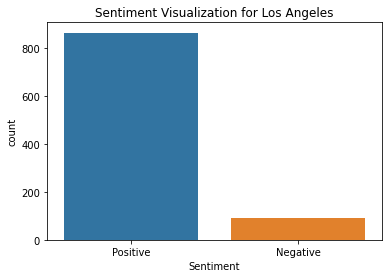

In [ ]:
# Visualize the breakdown of positive and negative tweets.

sns.countplot(x='Sentiment', data=sentiment_df).set_title("Sentiment Visualization for Los Angeles")

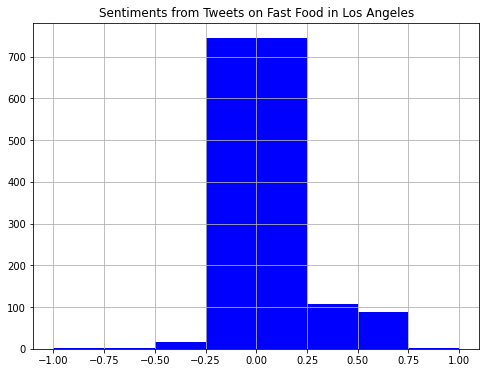

In [ ]:
# Plot histogram to gauge sentiment across all analyzed tweets.

fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on Fast Food in Los Angeles")
plt.show()

## San Diego

In [ ]:
# Create a custom tweet search by defining the query, geographical location, language, and dates from which we are collecting tweets.
geoc="32.7157,-117.1611,25mi"
max_tweets = 5000

tweets = tw.Cursor(api.search,
                   q=('fast food OR fastfood OR fast-food OR #fastfood'), 
                   geocode=geoc,
                   lang="en",
                   since='2018-05-26').items(max_tweets)

# Remove URLs
tweets_cleaned = [remove_url(tweet.text) for tweet in tweets]

In [ ]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_cleaned]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.35,
 TextBlob("RT JackBox GWR How many retweets to get this added as the worlds largest fast food charcuterie board"))

In [ ]:
# Create list of polarity valuesx and tweet text
sentiment_scores = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_scores[0]

[0.35,
 'RT JackBox GWR How many retweets to get this added as the worlds largest fast food charcuterie board']

In [ ]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_scores, columns=["Score", "tweet"])
sentiment_df = sentiment_df[sentiment_df.Score != 0]


sentiment_df.head()

,Score,tweet
0,0.350000,RT JackBox GWR How many retweets to get this a...
1,0.136364,Dfaw21 CarolHa37293912 texasdemocrats This is ...
2,0.350000,RT JackBox GWR How many retweets to get this a...
3,0.350000,GWR How many retweets to get this added as the...
4,0.200000,lucascrisco Buy a fast food company like Wendy...


In [ ]:
# Let's get the mean polarity of the tweet. The closer to 1, the more positive the sentiment. The closer to negative 1, the more negative the sentiment 
# towards fast food. 

sd_sentmean = sentiment_df['Score'].mean()
sd_sentstd = sentiment_df['Score'].std()
sd_sentmean

0.15595011577569715

In [ ]:
# Classify scores into positive as greater than 0, and negative as less than 0. 

sentiment_df['Sentiment']= np.where(sentiment_df['Score']>0,"Positive","Negative")

Text(0.5, 1.0, 'Sentiment Visualization for San Diego')

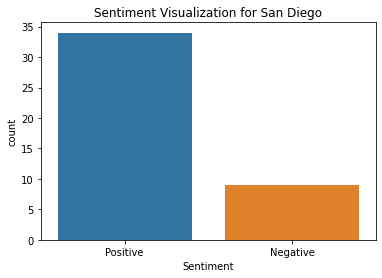

In [ ]:
# Visualize the breakdown of positive and negative tweets.

sns.countplot(x='Sentiment', data=sentiment_df).set_title("Sentiment Visualization for San Diego")

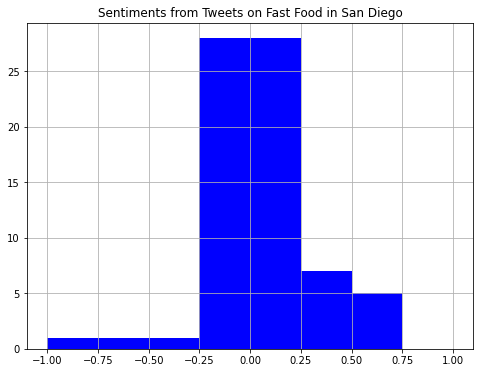

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on Fast Food in San Diego")
plt.show()

## San Francisco

In [ ]:
# Create a custom tweet search by defining the query, geographical location, language, and dates from which we are collecting tweets.
query = "#fast-food -filter:retweets"
geoc="37.7749,-122.4194,25mi"
max_tweets = 5000

tweets = tw.Cursor(api.search,
                   q=('fast food OR fastfood OR fast-food OR #fastfood'), 
                   geocode=geoc,
                   lang="en",
                   since='2018-05-26').items(max_tweets)

# Remove URLs
tweets_cleaned = [remove_url(tweet.text) for tweet in tweets]

In [ ]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_cleaned]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.03750000000000001,
 TextBlob("RT workingeastbay Hotel workers amp fast food workers have their rights violated frequently amp Oakland is doing little to hold employers ac"))

In [ ]:
# Create list of polarity valuesx and tweet text
sentiment_scores = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_scores[0]

[0.03750000000000001,
 'RT workingeastbay Hotel workers amp fast food workers have their rights violated frequently amp Oakland is doing little to hold employers ac']

In [ ]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_scores, columns=["Score", "tweet"])
sentiment_df = sentiment_df[sentiment_df.Score != 0]


sentiment_df.head()

,Score,tweet
0,0.037500,RT workingeastbay Hotel workers amp fast food ...
1,0.275000,DanPriceSeattle TheDailyShow I know someone th...
2,-0.100000,Truffles on fast food taste like trash Worse t...
3,-0.231818,RT SocialGreg A McDonalds in Illinois is so de...
4,-0.022222,I make less than a fast food worker The milita...


In [ ]:
# Let's get the mean polarity of the tweet. The closer to 1, the more positive the sentiment. The closer to negative 1, the more negative the sentiment 
# towards fast food. 

sf_sentmean = sentiment_df['Score'].mean()
sf_sentstd = sentiment_df['Score'].std()
sf_sentmean

0.3063464094759884

In [ ]:
# Classify scores into positive as greater than 0, and negative as less than 0. 

sentiment_df['Sentiment']= np.where(sentiment_df['Score']>0,"Positive","Negative")

Text(0.5, 1.0, 'Sentiment Visualization for San Francisco')

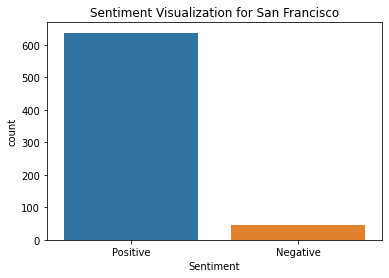

In [ ]:
# Visualize the breakdown of positive and negative tweets.

sns.countplot(x='Sentiment', data=sentiment_df).set_title("Sentiment Visualization for San Francisco")

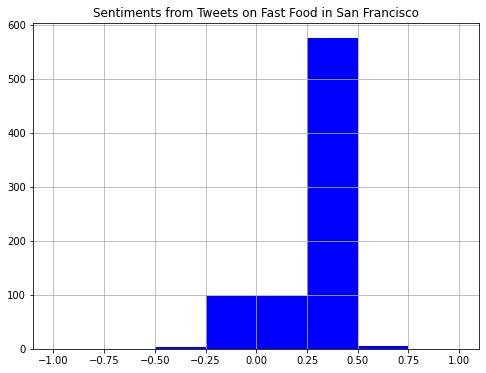

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on Fast Food in San Francisco")
plt.show()

## San Jose

In [ ]:
# Create a custom tweet search by defining the query, geographical location, language, and dates from which we are collecting tweets.
query = "#fast-food -filter:retweets"
geoc="37.3382,-121.8863,25mi"
max_tweets = 5000

tweets = tw.Cursor(api.search,
                   q=('fast food OR fastfood OR fast-food OR #fastfood'), 
                   geocode=geoc,
                   lang="en",
                   since='2018-05-26').items(max_tweets)

# Remove URLs
tweets_cleaned = [remove_url(tweet.text) for tweet in tweets]

In [ ]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_cleaned]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("bIuehours Ive worked for a fastfood environment and I only lasted for two days I can feel their pain"))

In [ ]:
# Create list of polarity valuesx and tweet text
sentiment_scores = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_scores[0]

[0.0,
 'bIuehours Ive worked for a fastfood environment and I only lasted for two days I can feel their pain']

In [ ]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_scores, columns=["Score", "tweet"])
sentiment_df = sentiment_df[sentiment_df.Score != 0]


sentiment_df.head()

,Score,tweet
1,0.200000,I have friends that work in fast food so I kin...
2,0.400000,Hmmm i see what you saying chipotle and Panera...
3,0.275000,I can see absolutely no reason why anyone can ...
4,0.153333,A high school buddy ended up managing a fast f...
5,0.100000,Fast Food Restaurants Experience Massive Surge...


In [ ]:
# Let's get the mean polarity of the tweet. The closer to 1, the more positive the sentiment. The closer to negative 1, the more negative the sentiment 
# towards fast food. 

sj_sentmean = sentiment_df['Score'].mean()
sj_sentstd = sentiment_df['Score'].std()
sj_sentmean

0.18977695424665125

In [ ]:
# Classify scores into positive as greater than 0, and negative as less than 0. 

sentiment_df['Sentiment']= np.where(sentiment_df['Score']>0,"Positive","Negative")

Text(0.5, 1.0, 'Sentiment Visualization for San Jose')

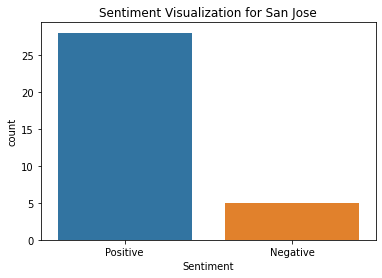

In [ ]:
# Visualize the breakdown of positive and negative tweets.

sns.countplot(x='Sentiment', data=sentiment_df).set_title("Sentiment Visualization for San Jose")

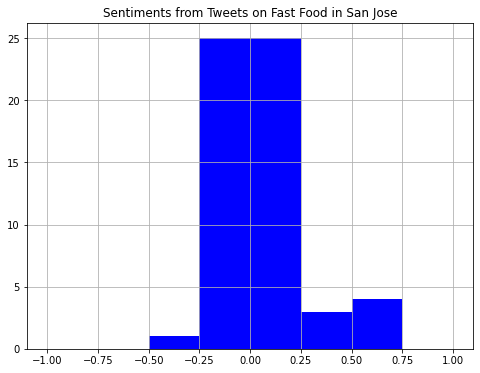

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on Fast Food in San Jose")
plt.show()

## Sacramento

In [ ]:
# Create a custom tweet search by defining the query, geographical location, language, and dates from which we are collecting tweets.
query = "#fast-food -filter:retweets"
geoc="38.5816,-121.4944,25mi"
max_tweets = 5000

tweets = tw.Cursor(api.search,
                   q=('fast food OR fastfood OR fast-food OR #fastfood'), 
                   geocode=geoc,
                   lang="en",
                   since='2018-05-26').items(max_tweets)

# Remove URLs
tweets_cleaned = [remove_url(tweet.text) for tweet in tweets]

In [ ]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_cleaned]

sentiment_objects[0].polarity, sentiment_objects[0]

(-0.12499999999999999,
 TextBlob("1 31721 Americans now eat more chicken than ever so fast food chains now compete over chicken rather than bu"))

In [ ]:
# Create list of polarity valuesx and tweet text
sentiment_scores = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_scores[0]

[-0.12499999999999999,
 '1 31721 Americans now eat more chicken than ever so fast food chains now compete over chicken rather than bu']

In [ ]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_scores, columns=["Score", "tweet"])
sentiment_df = sentiment_df[sentiment_df.Score != 0]


sentiment_df.head()

,Score,tweet
0,-0.125000,1 31721 Americans now eat more chicken than ev...
1,0.066667,Jotto999 I take issue with you saying teens wi...
2,-0.037500,NateSilver538 Long slow line at fast food plac...
3,0.200000,RT anisyuhadah tbh idk why tapi selalu tertari...
4,0.200000,tbh idk why tapi selalu tertarik dekat fast fo...


In [ ]:
# Let's get the mean polarity of the tweet. The closer to 1, the more positive the sentiment. The closer to negative 1, the more negative the sentiment 
# towards fast food. 

sac_sentmean = sentiment_df['Score'].mean()
sac_sentsd = sentiment_df['Score'].std()
sac_sentmean

0.1833024691358025

In [ ]:
# Classify scores into positive as greater than 0, and negative as less than 0. 

sentiment_df['Sentiment']= np.where(sentiment_df['Score']>0,"Positive","Negative")

Text(0.5, 1.0, 'Sentiment Visualization for Sacramento')

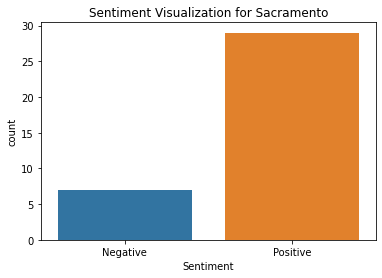

In [ ]:
# Visualize the breakdown of positive and negative tweets.

sns.countplot(x='Sentiment', data=sentiment_df).set_title("Sentiment Visualization for Sacramento")

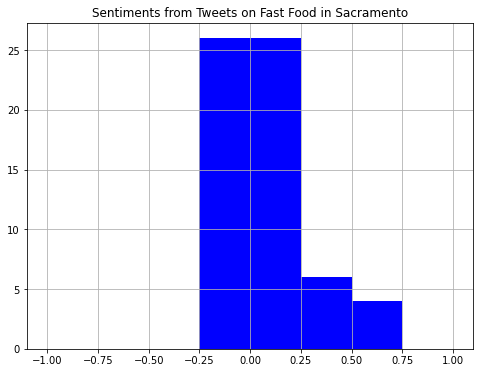

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on Fast Food in Sacramento")
plt.show()

## Summary

In [ ]:
print('Los Angeles: The mean score is', round(la_sentmean,2), "and the standard deviation is", round(la_sentstd,2))
print('San Diego: The mean score is', round(sd_sentmean,2), "and the standard deviation is", round(sd_sentstd,2))
print('San Francisco: The mean score is', round(sf_sentmean,2), "and the standard deviation is", round(sf_sentstd,2))
print('San Jose: The mean score is', round(sj_sentmean,2), "and the standard deviation is", round(sj_sentstd,2))
print('Sacramento: The mean score is', round(sac_sentmean,2), "and the standard deviation is", round(sac_sentsd,2))

Los Angeles: The mean score is 0.15 and the standard deviation is 0.19
San Diego: The mean score is 0.16 and the standard deviation is 0.3
San Francisco: The mean score is 0.31 and the standard deviation is 0.13
San Jose: The mean score is 0.19 and the standard deviation is 0.22
Sacramento: The mean score is 0.18 and the standard deviation is 0.21


In [ ]:
### DRAFT ### 


#import os
from dotenv import load_dotenv
import tweepy

CONSUMER_KEY = os.environ['CONSUMER_KEY']
CONSUMER_SECRET = os.environ['CONSUMER_SECRET']
ACCESS_TOKEN = os.environ['ACCESS_TOKEN']
ACCESS_SECRET = os.environ['ACCESS_SECRET']

load_dotenv()
## set API connection
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

api = tweepy.API(auth)

query = 'fast-food'
geoc="38.9072,-77.0369,10mi"
max_tweets = 10
[print(status) for status in tweepy.Cursor(api.search, geocode=geoc, q=query).items(max_tweets)]

Status(_api=<tweepy.api.API object at 0x7f5d42b7ded0>, _json={'created_at': 'Wed May 26 17:01:33 +0000 2021', 'id': 1397598796679368720, 'id_str': '1397598796679368720', 'text': 'The fast-food giant is struggling to recruit staff as America reopens for business https://t.co/M5TivywYMc', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/M5TivywYMc', 'expanded_url': 'https://econ.st/3vr3teI', 'display_url': 'econ.st/3vr3teI', 'indices': [83, 106]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 32353291, 'id_str': '32353291', 'name': 'The Economist', 'screen_name': 'EconUS', 'location': 'Washington', 'description': 'The latest news from @TheEconomist a

[None, None, None, None, None, None, None, None, None, None]